# Benodigde libraries importeren

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import pandas.api.types as ptypes


# Bestand inladen en data filteren

In [2]:
# excel bestand maxilia geimporteerd en kolommen gefilterd 

data = pd.read_excel('Sample dataset.xlsx') 
df = pd.DataFrame(data, columns = ['email','Orderdate','OrderID','TurnoverLead', 'BuyinLead', 'LeadPhase','LeadStatus'])
df.head()

,email,Orderdate,OrderID,TurnoverLead,BuyinLead,LeadPhase,LeadStatus
0,janneke.van.wingerden@hotmail.com,2014-04-22,27654,840.0,0.0,Order,Gefactureerd
1,info@ferox-design.com,2014-07-30,32291,235.0,0.0,Order,Gefactureerd
2,info@ferox-design.com,2014-07-30,32291,235.0,0.0,Order,Gefactureerd
3,tim@schoonderbeek-cv.nl,2014-09-30,38145,219.0,0.0,Order,Gefactureerd
4,jm@luxuria-import.com,2014-10-16,39348,635.0,0.0,Order,Gefactureerd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
email           27 non-null object
Orderdate       27 non-null datetime64[ns]
OrderID         27 non-null int64
TurnoverLead    27 non-null float64
BuyinLead       27 non-null float64
LeadPhase       27 non-null object
LeadStatus      27 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.6+ KB


In [4]:
# lege rijen 'NaT' eruit gefilterd 
# Email bevat @ controle
# Duplicaten verwijderen

df = df.dropna(axis=0, how = 'any', inplace=False)
df = df[~df['email'].str.contains('@')==False]
df = df.drop_duplicates('OrderID', keep='first')
df.head()

,email,Orderdate,OrderID,TurnoverLead,BuyinLead,LeadPhase,LeadStatus
0,janneke.van.wingerden@hotmail.com,2014-04-22,27654,840.0,0.0,Order,Gefactureerd
1,info@ferox-design.com,2014-07-30,32291,235.0,0.0,Order,Gefactureerd
3,tim@schoonderbeek-cv.nl,2014-09-30,38145,219.0,0.0,Order,Gefactureerd
4,jm@luxuria-import.com,2014-10-16,39348,635.0,0.0,Order,Gefactureerd
5,d.engelkes@welzijnbergen.nl,2014-10-28,39714,0.0,0.0,Order,Gefactureerd


In [5]:
df['Orderdate']=pd.to_datetime(df['Orderdate'], format='%d-%m-%Y')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 26
Data columns (total 7 columns):
email           15 non-null object
Orderdate       15 non-null datetime64[ns]
OrderID         15 non-null int64
TurnoverLead    15 non-null float64
BuyinLead       15 non-null float64
LeadPhase       15 non-null object
LeadStatus      15 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 960.0+ bytes


In [7]:
df.describe()

,OrderID,TurnoverLead,BuyinLead
count,15.000000,15.000000,15.0
mean,38642.933333,604.217333,0.0
std,3784.308645,672.351769,0.0
min,27654.000000,0.000000,0.0
25%,38746.500000,198.200000,0.0
50%,39776.000000,385.180000,0.0
75%,40565.500000,896.080000,0.0
max,42331.000000,2625.000000,0.0


In [8]:
# Leadphase = order
# Leadstatus = gefactureerd
df = df[~df['LeadPhase'].str.contains('Order')==False]
df = df[~df['LeadStatus'].str.contains('Gefactureerd')==False]
df.head()

,email,Orderdate,OrderID,TurnoverLead,BuyinLead,LeadPhase,LeadStatus
0,janneke.van.wingerden@hotmail.com,2014-04-22,27654,840.0,0.0,Order,Gefactureerd
1,info@ferox-design.com,2014-07-30,32291,235.0,0.0,Order,Gefactureerd
3,tim@schoonderbeek-cv.nl,2014-09-30,38145,219.0,0.0,Order,Gefactureerd
4,jm@luxuria-import.com,2014-10-16,39348,635.0,0.0,Order,Gefactureerd
5,d.engelkes@welzijnbergen.nl,2014-10-28,39714,0.0,0.0,Order,Gefactureerd


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 26
Data columns (total 7 columns):
email           15 non-null object
Orderdate       15 non-null datetime64[ns]
OrderID         15 non-null int64
TurnoverLead    15 non-null float64
BuyinLead       15 non-null float64
LeadPhase       15 non-null object
LeadStatus      15 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 960.0+ bytes


In [10]:
# Check data bevat voldoet aan bepaalde condities
assert ptypes.is_datetime64_any_dtype(df['Orderdate'])
assert df['email'].str.contains('@').all()
assert df['LeadPhase'].eq('Order').all()
assert df['LeadStatus'].eq('Gefactureerd').all()


# Data grouperen per klant

In [11]:
# group by customer ID
# hoeveel orders zijn er gedaan per customer
# totale uitgaven per customer 

df_clv = df.groupby('email').agg({
                                                        'Orderdate': lambda date: (date.max() - date.min()).days,
                                                        'OrderID': lambda num: len(num), 
                                                        'TurnoverLead': lambda price: price.sum()
                                                    }) 
df_clv.head()

,Orderdate,OrderID,TurnoverLead
email,,,
annelammertink@live.nl,0,1,0.00
c.huigen@denf.nl,0,1,1057.00
d.engelkes@welzijnbergen.nl,0,1,0.00
e.kroon@kbkbouwgroep.nl,0,1,177.40
info@airportmultiservice.com,0,1,1027.52


In [12]:
# rename kolommen 

df_clv.columns = ['days_customer', 'total_transactions', 'total_spent']
df_clv.head()

,days_customer,total_transactions,total_spent
email,,,
annelammertink@live.nl,0,1,0.00
c.huigen@denf.nl,0,1,1057.00
d.engelkes@welzijnbergen.nl,0,1,0.00
e.kroon@kbkbouwgroep.nl,0,1,177.40
info@airportmultiservice.com,0,1,1027.52


In [13]:
df_clv.describe()

,days_customer,total_transactions,total_spent
count,15.0,15.0,15.000000
mean,0.0,1.0,604.217333
std,0.0,0.0,672.351769
min,0.0,1.0,0.000000
25%,0.0,1.0,198.200000
50%,0.0,1.0,385.180000
75%,0.0,1.0,896.080000
max,0.0,1.0,2625.000000


# Berekenen van de totale CLV

In [14]:
# gemiddelde order waarde 

avg_order_value = sum(df_clv['total_spent']) / sum(df_clv['total_transactions'])
print(avg_order_value)

604.2173333333334


In [15]:
# hoe vaak koopt iemand gemiddeld iets

purchase_frequency = sum(df_clv['total_transactions']) / df_clv.shape[0]
print(purchase_frequency)

1.0


In [16]:
# hoe vaak komt iemand terug

repeat_rate = df_clv[df_clv.total_transactions > 1].shape[0] / df_clv.shape[0] 
print(repeat_rate)

0.0


In [17]:
# churnrate: hoeveel % doet na 1 aankoop geen bestelling meer

churn_rate = 1 - repeat_rate
print(churn_rate)

1.0


In [18]:
# gemiddelde marge  

profit = sum(df['TurnoverLead']) - sum(df['BuyinLead'])
margin = profit / sum(df['TurnoverLead'])
    
print(margin)

1.0


In [19]:
# totale clv & clv marge 
# in het blok hierboven is de marge berekend ('margin'), maar je kan ook een getal noteren ipv 'margin'

total_clv = (avg_order_value * purchase_frequency) / churn_rate 
total_clv_margin = total_clv * margin

print(total_clv) # het eerste getal is de totale clv
print(total_clv_margin) # het tweede getal is de clv waarbij rekening is gehouden met de berekende marge

604.2173333333334
604.2173333333334


In [20]:
# Bovenstaande cijfers in kolom neerzetten zodat de data in datastudio kan worden gebruikt
set_total_clv = avg_order_value, purchase_frequency, churn_rate, total_clv, total_clv_margin 
df_total_clv = pd.DataFrame(set_total_clv, columns= ['Waarde'], index = ['Gemiddelde orderwaarde' , 'Frequentie aankoop', 'Churn rate' , 'CLV', 'CLV marge'])
df_clv_values=df_total_clv.T.groupby(level=0).agg(lambda x : x.values.tolist()).stack().apply(pd.Series).unstack().sort_index(level=1,axis=1)
df_clv_values.columns=df_clv_values.columns.droplevel(level=0)
df_clv_values.head()

,CLV,CLV marge,Churn rate,Frequentie aankoop,Gemiddelde orderwaarde
Waarde,604.217333,604.217333,1.0,1.0,604.217333


In [159]:
df_clv_values.to_excel('CLV_waardes.xlsx')

   # Transacties en churn rate per maand uiteenzetten

In [21]:
# transacties per klant per maand uiteenzetten
df_monthly = df.set_index('Orderdate')
df_monthly = df_monthly.pivot_table(
    index=['email'],
    columns=pd.Grouper(freq='M'),
    values='OrderID', 
    aggfunc='count',
    fill_value=0
)

# Format column headers to human readable format
#df_monthly.columns = [x.strftime('%b %Y') for x in df_monthly.columns]
df_monthly

Orderdate,2014-04-30,2014-07-31,2014-09-30,2014-10-31,2014-11-30
email,,,,,
annelammertink@live.nl,0,0,0,0,1
c.huigen@denf.nl,0,0,0,1,0
d.engelkes@welzijnbergen.nl,0,0,0,1,0
e.kroon@kbkbouwgroep.nl,0,0,0,0,1
info@airportmultiservice.com,0,0,0,0,1
info@ferox-design.com,0,1,0,0,0
info@kombino.nl,0,0,0,0,1
info@montagebedrijfhorlings.nl,0,0,0,0,1
janneke.van.wingerden@hotmail.com,1,0,0,0,0


In [22]:
repeat_rate = df_monthly[df_monthly > 1].count() / df_monthly[df_monthly > 0].count()
df_churn = repeat_rate.to_frame(name='repeat_rate')

In [23]:
df_churn['churn_rate'] = 1 - df_churn['repeat_rate']
df_churn.head()


,repeat_rate,churn_rate
Orderdate,,
2014-04-30,0.0,1.0
2014-07-31,0.0,1.0
2014-09-30,0.0,1.0
2014-10-31,0.0,1.0
2014-11-30,0.0,1.0


# CLV per klant uitrekenen

In [24]:
# clv per customer

df_clv['customer_order_value'] = df_clv['total_spent'] / df_clv['total_transactions']
df_clv['customer_clv'] = (df_clv['customer_order_value'] * purchase_frequency) / churn_rate
df_clv['customer_clv_margin'] = df_clv['customer_clv'] * margin

df_clv.head()

,days_customer,total_transactions,total_spent,customer_order_value,customer_clv,customer_clv_margin
email,,,,,,
annelammertink@live.nl,0,1,0.00,0.00,0.00,0.00
c.huigen@denf.nl,0,1,1057.00,1057.00,1057.00,1057.00
d.engelkes@welzijnbergen.nl,0,1,0.00,0.00,0.00,0.00
e.kroon@kbkbouwgroep.nl,0,1,177.40,177.40,177.40,177.40
info@airportmultiservice.com,0,1,1027.52,1027.52,1027.52,1027.52


In [25]:
df_clv.describe()

,days_customer,total_transactions,total_spent,customer_order_value,customer_clv,customer_clv_margin
count,15.0,15.0,15.000000,15.000000,15.000000,15.000000
mean,0.0,1.0,604.217333,604.217333,604.217333,604.217333
std,0.0,0.0,672.351769,672.351769,672.351769,672.351769
min,0.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,198.200000,198.200000,198.200000,198.200000
50%,0.0,1.0,385.180000,385.180000,385.180000,385.180000
75%,0.0,1.0,896.080000,896.080000,896.080000,896.080000
max,0.0,1.0,2625.000000,2625.000000,2625.000000,2625.000000


In [165]:
df_clv.to_excel('CLV_per_klant.xlsx')

In [32]:
# Uiteenzetting uitgaves klanten per maand
df.set_index('Orderdate', inplace=True)

In [38]:
#totale transacties / opbrengst per maand

df_transacties = df.groupby(pd.Grouper(freq='M')).agg(
    {
        'OrderID': len, 
        'TurnoverLead': sum,
        'email': pd.Series.nunique
    }
)

df_transacties.head()

,OrderID,TurnoverLead,email
Orderdate,,,
2014-04-30,1,840.0,1
2014-05-31,0,0.0,0
2014-06-30,0,0.0,0
2014-07-31,1,235.0,1
2014-08-31,0,0.0,0


In [39]:
# Uiteenzetting uitgaves klanten per maand
# df['month_yr'] = df['Orderdate'].apply(lambda x: x.strftime('%b %Y'))
# df.head()


In [43]:
# totale transacties / opbrengst per maand

# df_transacties = df.groupby('month_yr').aggregate({
#                                                        'OrderID': lambda num: len(num), 
#                                                        'TurnoverLead': lambda price: price.sum(),
#                                                        'email': pd.Series.nunique
#                                                    }) 
# df_transacties.head()

In [44]:
df_transacties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2014-04-30 to 2014-11-30
Freq: M
Data columns (total 3 columns):
OrderID         8 non-null int64
TurnoverLead    8 non-null float64
email           8 non-null int64
dtypes: float64(1), int64(2)
memory usage: 576.0 bytes


In [48]:
df_transacties.columns = ['total_transactions', 'total_spent', 'total_unique_customers']
df_transacties.head(5)

,total_transactions,total_spent,total_unique_customers
Orderdate,,,
2014-04-30,1,840.0,1
2014-05-31,0,0.0,0
2014-06-30,0,0.0,0
2014-07-31,1,235.0,1
2014-08-31,0,0.0,0


In [46]:
df_transacties.describe()

,total_transactions,total_spent,total_unique_customers
count,8.000000,8.000000,8.000000
mean,1.875000,1132.907500,1.875000
std,3.044316,2081.788513,3.044316
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,227.000000,1.000000
75%,1.500000,1053.000000,1.500000
max,9.000000,6077.260000,9.000000


In [31]:
df_transacties.to_excel('Overzicht_per_maand.xlsx')

# CLV per maand berekenen

In [69]:
# CLV per maand berekenen
df_transacties['purchase_frequency_month'] = df_transacties['total_transactions'] / df_transacties['total_unique_customers']
df_transacties['avg_order_value_month'] = df_transacties['total_spent'] / df_transacties['total_transactions'] 
df_transacties['CLV'] = (df_transacties['avg_order_value_month'] * df_transacties['purchase_frequency_month']) / df_churn['churn_rate']
df_transacties['CLV_margin'] = df_transacties['CLV'] * margin
df_transacties.head()

,total_transactions,total_spent,total_unique_customers,purchase_frequency_month,avg_order_value_month,CLV,CLV_margin
Orderdate,,,,,,,
2014-04-30,1,840.0,1,1.0,840.0,840.0,840.0
2014-05-31,0,0.0,0,NaN,NaN,NaN,NaN
2014-06-30,0,0.0,0,NaN,NaN,NaN,NaN
2014-07-31,1,235.0,1,1.0,235.0,235.0,235.0
2014-08-31,0,0.0,0,NaN,NaN,NaN,NaN


In [137]:
# New dataframe to calculate CLV averages. Needs "index" & "number of months" helper columns
# Even if some rows ("months") are missing, "number of months" is still correct
# Because it looks at the dates, not the index locations. 
df_clv_cum = df_transacties[['CLV']].copy()
df_clv_cum['Index'] = np.arange(len(df_clv_cum))
df_clv_cum['Number_of_months'] = df_clv_cum['Index'].apply(
    lambda x: (df_clv_cum.index[x] - df_clv_cum.index[0]) // np.timedelta64(1, 'M') + 1)

df_clv_cum['CLV_AVG'] = df_clv_cum['CLV'].cumsum().div(df_clv_cum['Number_of_months'])
df_clv_cum

,CLV,Index,Number_of_months,CLV_AVG
Orderdate,,,,
2014-04-30,840.000000,0,1,840.000000
2014-05-31,NaN,1,2,NaN
2014-06-30,NaN,2,3,NaN
2014-07-31,235.000000,3,4,268.750000
2014-08-31,NaN,4,5,NaN
2014-09-30,219.000000,5,6,215.666667
2014-10-31,564.000000,6,7,265.428571
2014-11-30,675.251111,7,8,316.656389


In [138]:
# df_clv_cum = pd.DataFrame(df_transacties.iloc[:,-2])
# df_clv_cum['CLV_cumulatief'] = df_clv_cum.rolling(window=4).mean()
# df_clv_cum.head()

# Statistieken CLV per klant

In [174]:
# statistieken van clv per customer 

import statistics

df_clv_list = df_clv['customer_clv'].values

x1 = statistics.mean(df_clv_list) # eerste getal is gemiddelde
x2 = statistics.median(df_clv_list) # tweede getal is mediaan
x3 = statistics.mode(df_clv_list) # derde getal is de modus 
x4 = statistics.stdev(df_clv_list) # vierde getal is de standaarddeviatie 

print(x1) 
print(x2) 
print(x3) 
print(x4)

604.2173333333334
385.18
0.0
672.351769106732


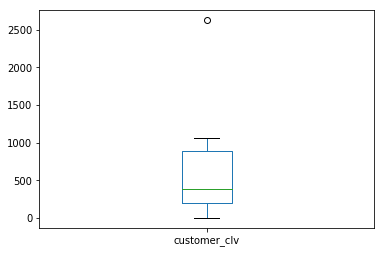

In [175]:
# box plot: visuele weergaven van de verdeling van de clv 
# zichtbaar = minimum, maximum, mediaan en kwartielafstanden 

import matplotlib.pyplot as plt 
df_clv.plot(y = 'customer_clv', kind = 'box') 
plt.show()

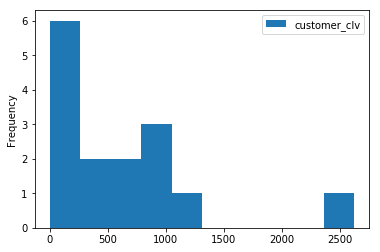

In [176]:
# histogram plot: visuele weergaven van frequentie verdeling van de clv 
# hoe vaak komt een clv waarde voor 

import matplotlib.pyplot as plt 
df_clv.plot(y = 'customer_clv', kind = 'hist') 
plt.show()